# Hyposthesis Testing and Model Training, using classified data to predict Heart Attack Risk.

## Group Members:

##### 1.Syed Darain Hyder Kazmi
##### 2.Muhammad Uzair Warraich

In [5]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats

from scipy import stats
from scipy.stats import norm,t
from scipy.stats import pointbiserialr
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
#Loading Dataset

df=pd.read_csv("Heart Attack.csv")
#printing some of the top rows
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


# Task#1

### Data Cleaning

In [7]:
# Print column names to verify the exact names
print(df.columns)

# Display the shape of the updated dataframe
print(df.shape)

# Display the first few rows of the updated dataset
df.head()


Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')
(1319, 9)


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [8]:
#Check for null values in each column
print("Null Entries:\n", df.isnull().sum())

Null Entries:
 age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


In [9]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated()

# Print the total number of duplicate rows
print(f"Total duplicate rows: {duplicate_rows.sum()}")

Total duplicate rows: 0


#### Encoding Gender and Class dataset

In [10]:
# Convert 'gender' to a categorical data type
df['gender'] = pd.Categorical(df['gender'])

# Convert 'class' to a categorical data type
df['class'] = pd.Categorical(df['class'])

# Verify the changes
print(df.info())
print("Unique values in 'gender':", df['gender'].unique())
print("Unique values in 'class':", df['class'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1319 non-null   int64   
 1   gender         1319 non-null   category
 2   impluse        1319 non-null   int64   
 3   pressurehight  1319 non-null   int64   
 4   pressurelow    1319 non-null   int64   
 5   glucose        1319 non-null   float64 
 6   kcm            1319 non-null   float64 
 7   troponin       1319 non-null   float64 
 8   class          1319 non-null   category
dtypes: category(2), float64(3), int64(4)
memory usage: 75.1 KB
None
Unique values in 'gender': [1, 0]
Categories (2, int64): [0, 1]
Unique values in 'class': ['negative', 'positive']
Categories (2, object): ['negative', 'positive']


In [11]:
# Step 1: Function to categorize pressure based on high and low values
def categorize_pressure(row):
    if row['pressurehight'] > 140 or row['pressurelow'] > 90:
        return 'High'
    elif row['pressurehight'] < 90 or row['pressurelow'] < 60:
        return 'Low'
    else:
        return 'Normal'

# Step 2: Apply the function to create the 'pressure' column
df['pressure'] = df.apply(categorize_pressure, axis=1)

# Step 3: Convert 'pressure' to a categorical data type
df['pressure'] = pd.Categorical(df['pressure'], categories=['Low', 'Normal', 'High'], ordered=True)

# Step 4: Drop the 'pressurehight' and 'pressurelow' columns
df = df.drop(['pressurehight', 'pressurelow'], axis=1)

# Verify the changes
print(df.info())
print(df['pressure'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1319 non-null   int64   
 1   gender    1319 non-null   category
 2   impluse   1319 non-null   int64   
 3   glucose   1319 non-null   float64 
 4   kcm       1319 non-null   float64 
 5   troponin  1319 non-null   float64 
 6   class     1319 non-null   category
 7   pressure  1319 non-null   category
dtypes: category(3), float64(3), int64(2)
memory usage: 55.9 KB
None
pressure
Normal    700
High      374
Low       245
Name: count, dtype: int64


In [12]:
print(df.columns)


Index(['age', 'gender', 'impluse', 'glucose', 'kcm', 'troponin', 'class',
       'pressure'],
      dtype='object')


In [13]:
df.head()

,age,gender,impluse,glucose,kcm,troponin,class,pressure
0,64,1,66,160.0,1.80,0.012,negative,High
1,21,1,94,296.0,6.75,1.060,positive,Low
2,55,1,64,270.0,1.99,0.003,negative,High
3,64,1,70,270.0,13.87,0.122,positive,Low
4,55,1,64,300.0,1.08,0.003,negative,Normal


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1319 non-null   int64   
 1   gender    1319 non-null   category
 2   impluse   1319 non-null   int64   
 3   glucose   1319 non-null   float64 
 4   kcm       1319 non-null   float64 
 5   troponin  1319 non-null   float64 
 6   class     1319 non-null   category
 7   pressure  1319 non-null   category
dtypes: category(3), float64(3), int64(2)
memory usage: 55.9 KB


In [15]:
# Convert 'class' column to binary numeric values during data cleaning
df['class'] = df['class'].map({'negative': 0, 'positive': 1})

# Verify the conversion
print("Updated 'class' column:")
print(df['class'].value_counts())


Updated 'class' column:
class
1    810
0    509
Name: count, dtype: int64


#### Removing Outliers

Processing column: age
Outlier Range: 20.0 <= age <= 92.0


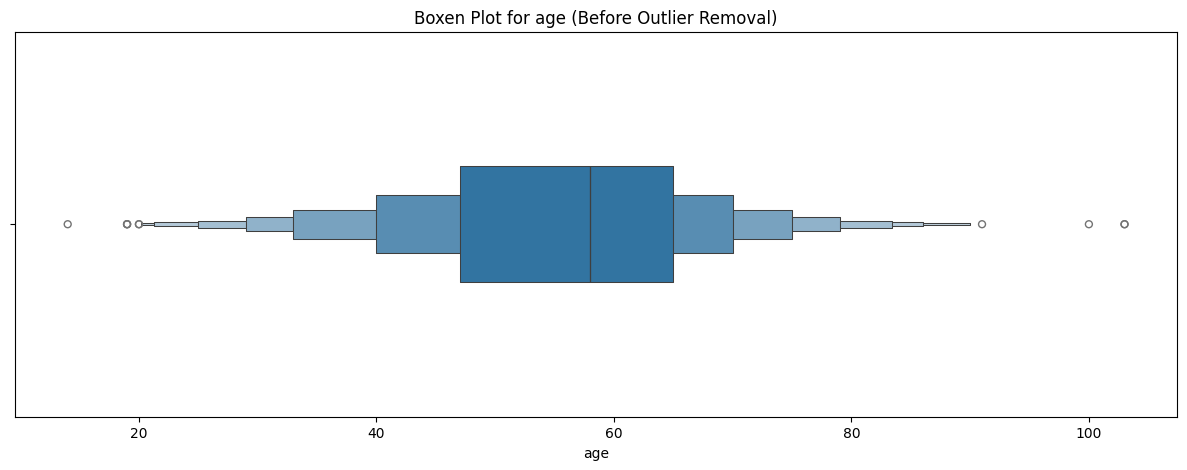

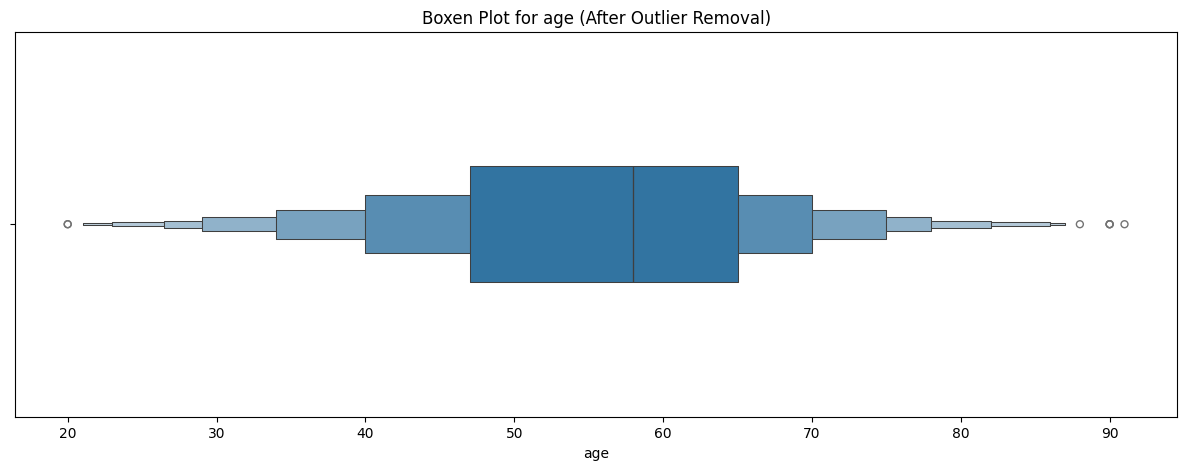

Processing column: impluse
Outlier Range: 32.5 <= impluse <= 116.5


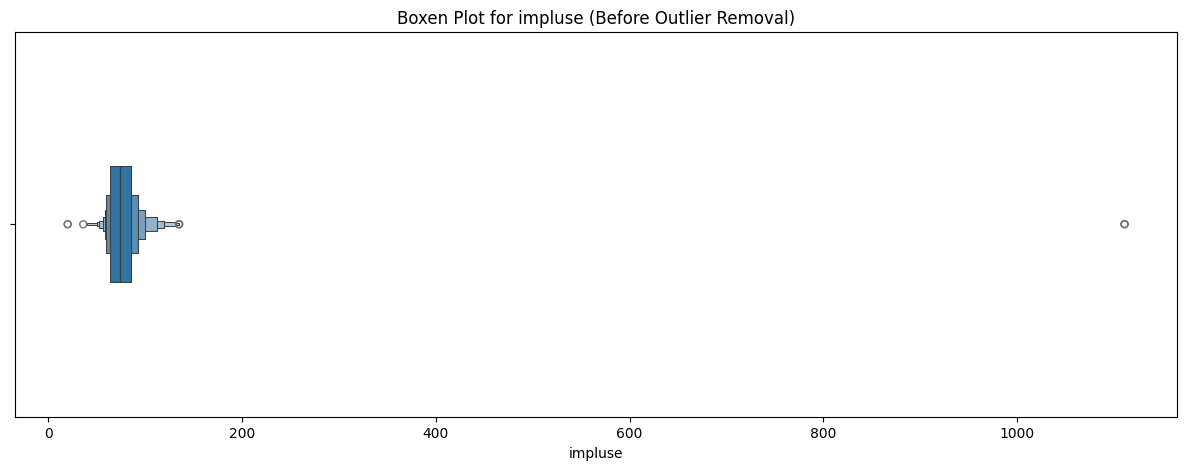

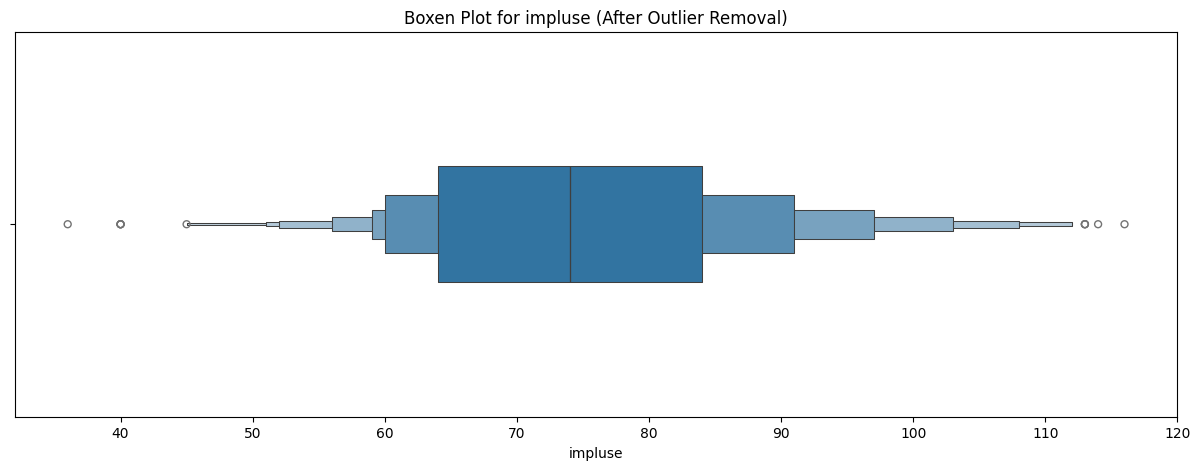

Processing column: glucose
Outlier Range: 0 <= glucose <= 280.5


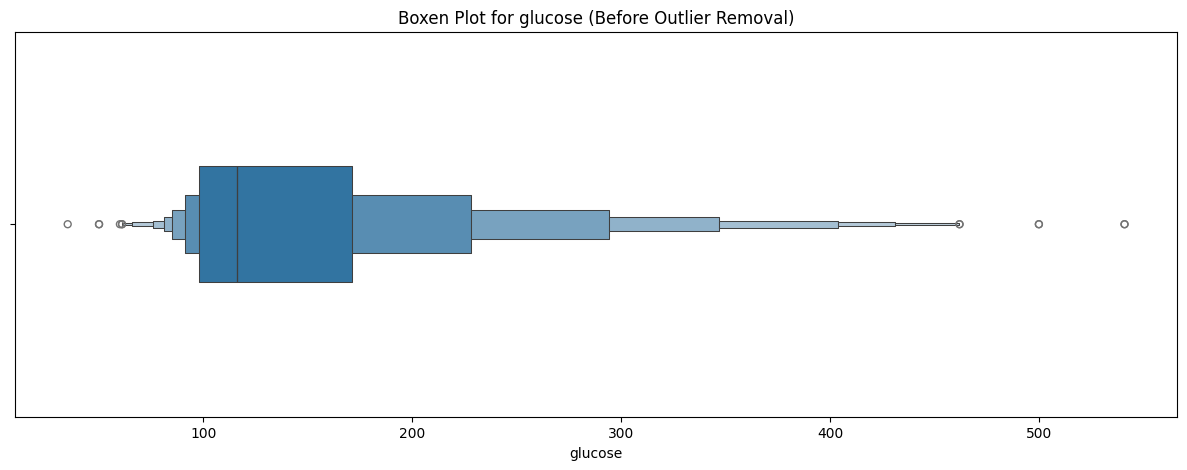

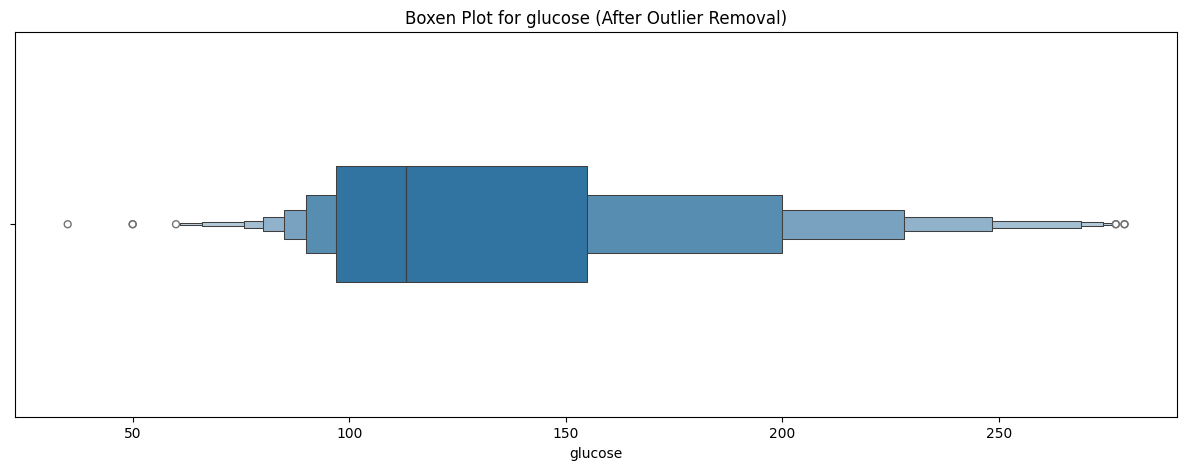

Processing column: kcm
Outlier Range: 0 <= kcm <= 11.9925


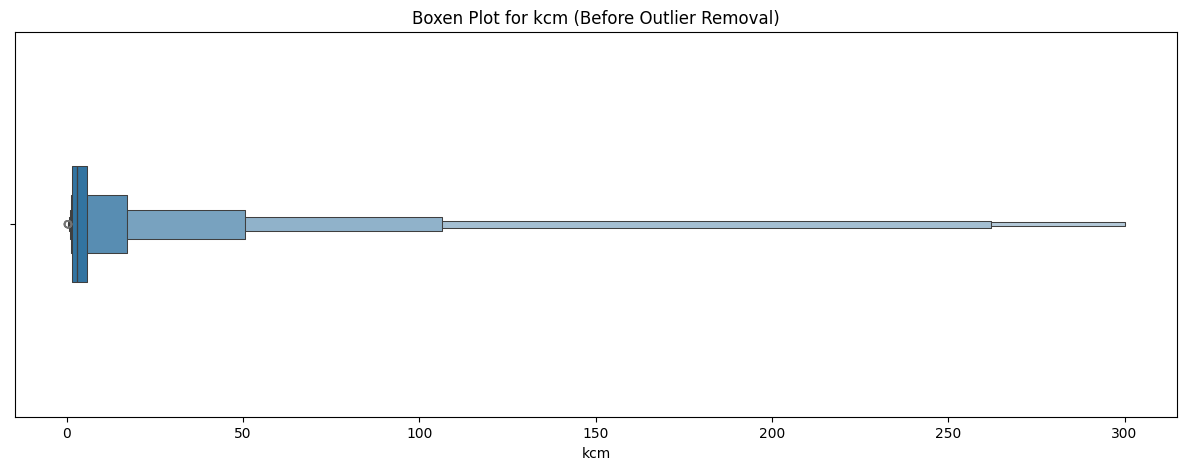

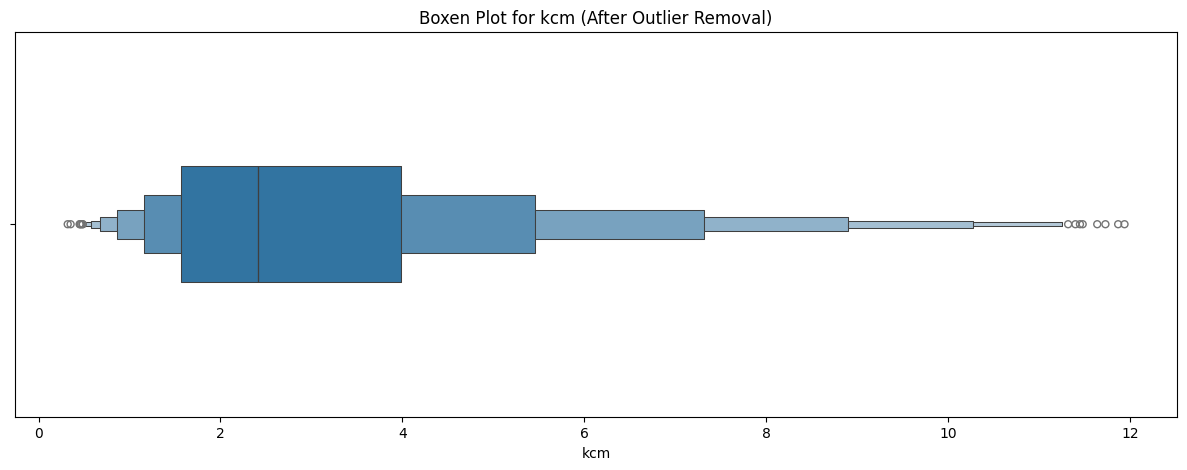

Processing column: troponin
Outlier Range: 0 <= troponin <= 0.20350000000000001


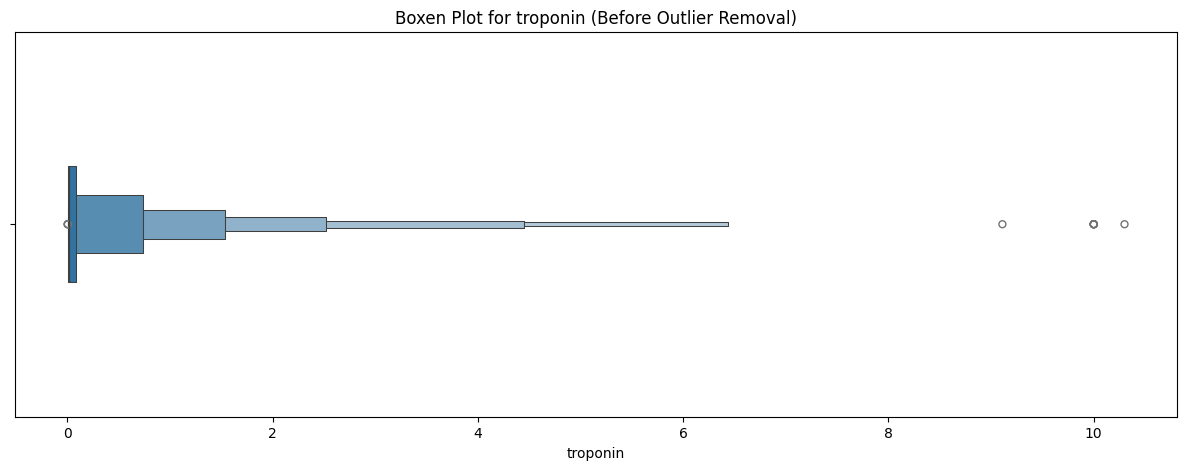

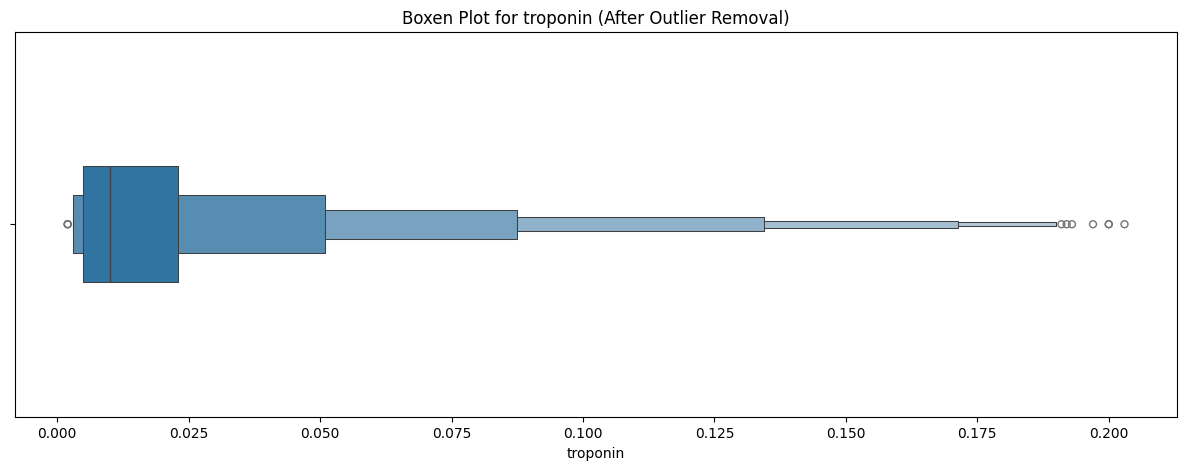

In [16]:
# Remove outliers for numeric columns
def outlier_remover(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            if lower < 0:
                lower = 0
            print(f"Processing column: {col}")
            print(f"Outlier Range: {lower} <= {col} <= {upper}")
            plt.figure(figsize=(15, 5))
            sns.boxenplot(x=df[col], width=0.3)
            plt.title(f"Boxen Plot for {col} (Before Outlier Removal)")
            plt.show()
            df = df[(df[col] >= lower) & (df[col] <= upper)]
            plt.figure(figsize=(15, 5))
            sns.boxenplot(x=df[col], width=0.3)
            plt.title(f"Boxen Plot for {col} (After Outlier Removal)")
            plt.show()
    return df

# Apply the function to remove outliers
df = outlier_remover(df)



In [17]:
len(df)

809

# Task#2

### Statistics

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       809 non-null    int64   
 1   gender    809 non-null    category
 2   impluse   809 non-null    int64   
 3   glucose   809 non-null    float64 
 4   kcm       809 non-null    float64 
 5   troponin  809 non-null    float64 
 6   class     809 non-null    category
 7   pressure  809 non-null    category
dtypes: category(3), float64(3), int64(2)
memory usage: 40.7 KB


In [19]:
df.describe()

,age,impluse,glucose,kcm,troponin
count,809.000000,809.000000,809.000000,809.000000,809.000000
mean,55.594561,75.035847,130.626329,3.109968,0.023143
std,13.714604,13.863102,48.550315,2.138290,0.035284
min,21.000000,36.000000,35.000000,0.321000,0.002000
25%,45.000000,63.000000,96.000000,1.600000,0.005000
50%,57.000000,74.000000,111.000000,2.500000,0.010000
75%,65.000000,84.000000,154.000000,4.050000,0.023000
max,91.000000,116.000000,279.000000,11.940000,0.203000


#### Checking if there is any sampling errors or imbalancement

In [20]:
# Apply value_counts() on the 'gender' column
print("Distribution of 'gender':")
print(df['gender'].value_counts())

# Apply value_counts() on the 'class' column
print("\nDistribution of 'class':")
print(df['class'].value_counts())


Distribution of 'gender':
gender
1    508
0    301
Name: count, dtype: int64

Distribution of 'class':
class
0    456
1    353
Name: count, dtype: int64


# Task#3

### Make Frequency Distribution Table for Numeric Data

,freq
age_distribution,
21.0 - 35.0,59
35.0 - 49.0,185
49.0 - 63.0,284
63.0 - 77.0,245
77.0 - 91.0,36


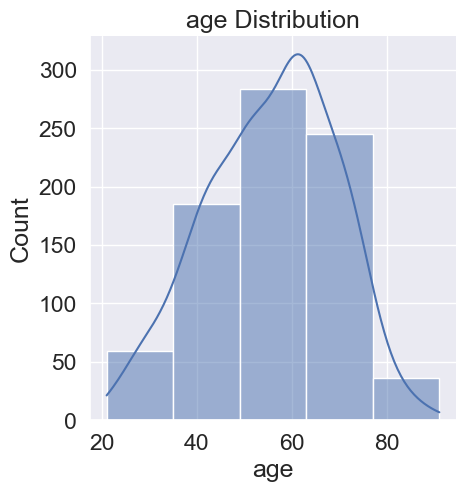

----------------------------------------------------------------------------------------------------


,freq
impluse_distribution,
36.0 - 52.0,13
52.0 - 68.0,282
68.0 - 84.0,309
84.0 - 100.0,159
100.0 - 116.0,46


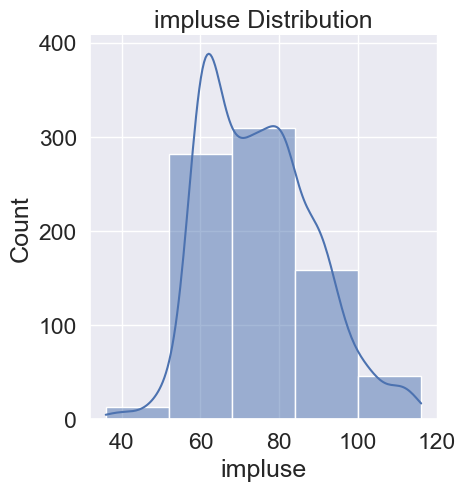

----------------------------------------------------------------------------------------------------


,freq
glucose_distribution,
35.0 - 83.8,49
83.8 - 132.6,476
132.6 - 181.4,144
181.4 - 230.2,98
230.2 - 279.0,42


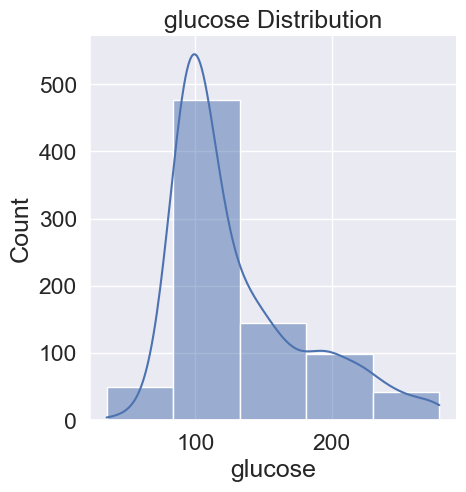

----------------------------------------------------------------------------------------------------


,freq
kcm_distribution,
0.32 - 2.64,425
2.64 - 4.97,258
4.97 - 7.29,77
7.29 - 9.62,33
9.62 - 11.94,16


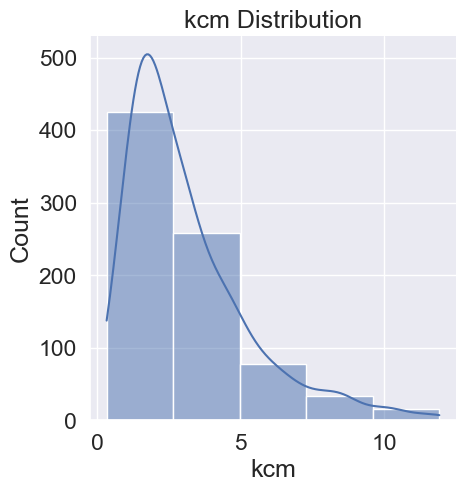

----------------------------------------------------------------------------------------------------


,freq
troponin_distribution,
0.0 - 0.04,689
0.04 - 0.08,65
0.08 - 0.12,28
0.12 - 0.16,11
0.16 - 0.2,16


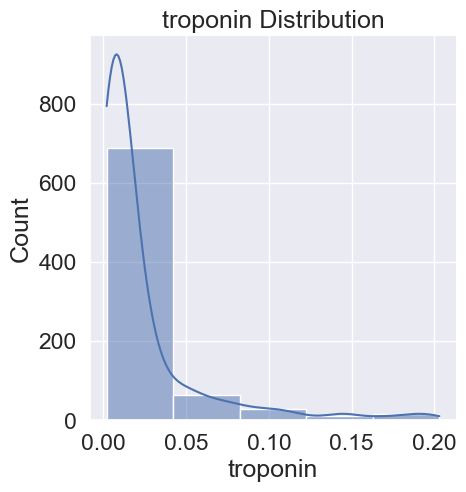

----------------------------------------------------------------------------------------------------


In [21]:

# Set seaborn style
sns.set(font_scale=1.5)

# Frequency distribution for numeric columns
def freq_dist(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            g = np.histogram(df[col], bins=5, density=False)
            col1 = []
            col2 = []
            for i in range(len(g[0])):
                col1.append(g[0][i])
                col2.append(f'{round(g[1][i], 2)} - {round(g[1][i+1], 2)}')
            freq_table = pd.DataFrame({f'{col}_distribution': col2, 'freq': col1})
            freq_table.set_index(f'{col}_distribution', inplace=True)
            display(freq_table)
            sns.displot(df[col], kde=True, bins=5).set(title=f'{col} Distribution')
            plt.show()
            print("-" * 100)

# Example usage
freq_dist(df)


In [22]:
# Checking for skewness in the numeric columns
skewness_before = df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness_before)

age        -0.229201
impluse     0.477588
glucose     1.177805
kcm         1.488254
troponin    2.949870
dtype: float64


##### As glusoce, kcm and troponin has skewed much from 0 so transforming them using log transformation

In [23]:
df['glucose'] = np.log1p(df['glucose'])
df['kcm'] = np.log1p(df['kcm'])
df['troponin'] = np.log1p(df['troponin'])


In [24]:
# Again checking for skewness in the numeric columns
skewness_after = df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness_after)

age        -0.229201
impluse     0.477588
glucose     0.574889
kcm         0.385839
troponin    2.829749
dtype: float64


#### Again applying skewness to troponin as it is still highly skewed.

In [25]:
# Apply log transformation again to 'troponin'
df['troponin'] = np.log1p(df['troponin'])

# Recheck skewness after the second transformation
skewness_after = df[['age', 'impluse', 'glucose', 'kcm', 'troponin']].skew()
print(skewness_after)


age        -0.229201
impluse     0.477588
glucose     0.574889
kcm         0.385839
troponin    2.722969
dtype: float64


#### As troponin is still highly skewed so lets try square root transformation

In [26]:
# Apply square root transformation to 'troponin'
df['troponin'] = np.sqrt(df['troponin'])

# Recheck skewness
skewness_after = df[['age', 'impluse', 'glucose', 'kcm', 'troponin']].skew()
print(skewness_after)


age        -0.229201
impluse     0.477588
glucose     0.574889
kcm         0.385839
troponin    1.653572
dtype: float64


#### Now its much more acceptable

## Task#4
### Graphs to show relations between different parameters

[Text(0.5, 1.0, 'Age vs Pressure')]

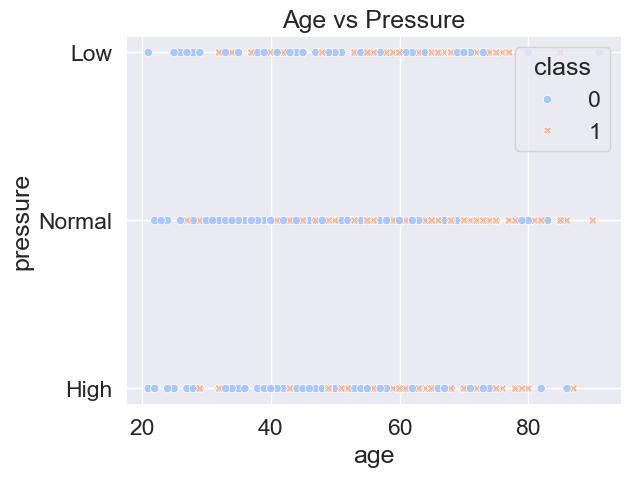

In [27]:
# Age vs Pressure
sns.scatterplot(
    x="age", 
    y="pressure", 
    data=df, 
    hue="class", 
    style="class", 
    palette="coolwarm" 
).set(title="Age vs Pressure")

[Text(0.5, 1.0, 'Age vs Glucose Levels')]

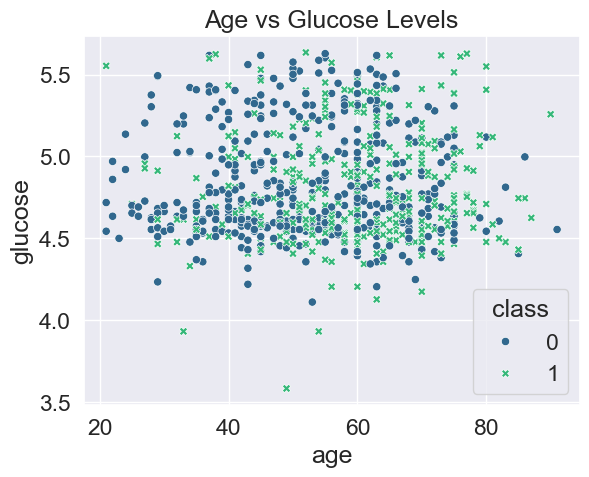

In [28]:
# Age vs Glucose Levels
sns.scatterplot(
    x="age", 
    y="glucose", 
    data=df, 
    hue="class", 
    style="class", 
    palette="viridis" 
).set(title="Age vs Glucose Levels")


[Text(0.5, 1.0, 'Age vs CK-MB Levels')]

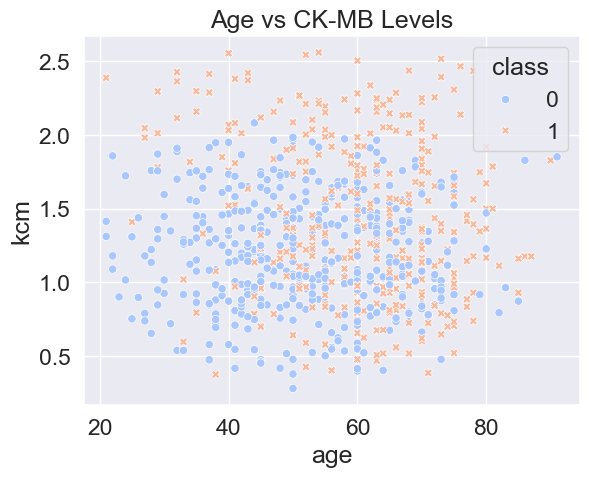

In [29]:
# Age vs KCM 
sns.scatterplot(
    x="age", 
    y="kcm", 
    data=df, 
    hue="class", 
    style="class", 
    palette="coolwarm"
).set(title="Age vs CK-MB Levels")


[Text(0.5, 1.0, 'Pressure vs Glucose Levels')]

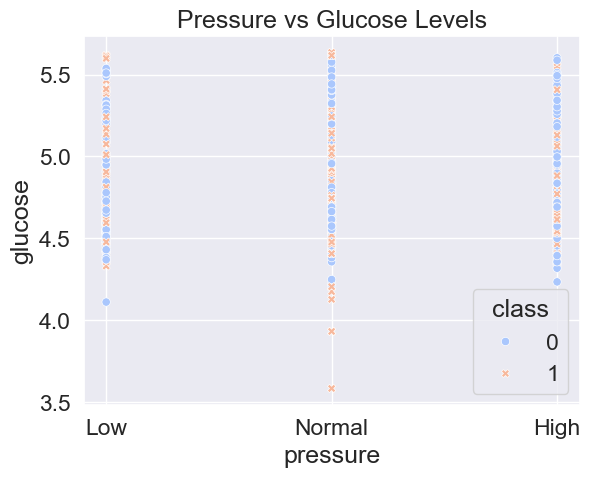

In [30]:
# Pressure vs Glucose Levels
sns.scatterplot(
    x="pressure", 
    y="glucose", 
    data=df, 
    hue="class", 
    style="class", 
    palette="coolwarm" 
).set(title="Pressure vs Glucose Levels")

[Text(0.5, 1.0, 'KCM vs Glucose Levels')]

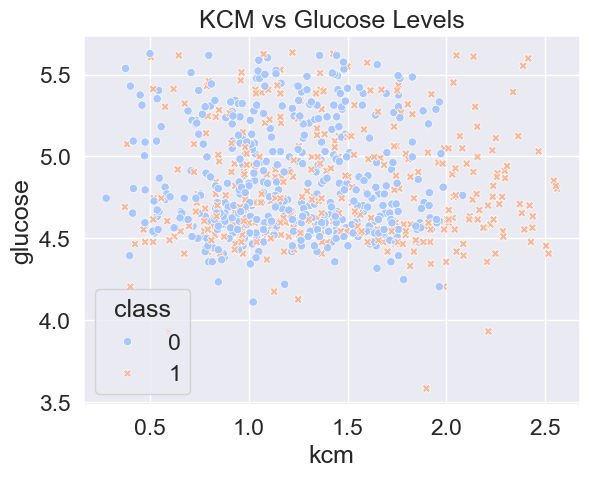

In [31]:
# KCM vs Glucose Levels
sns.scatterplot(
    x="kcm", 
    y="glucose", 
    data=df, 
    hue="class", 
    style="class", 
    palette="coolwarm" 
).set(title="KCM vs Glucose Levels")

[Text(0.5, 1.0, 'Troponin vs Age')]

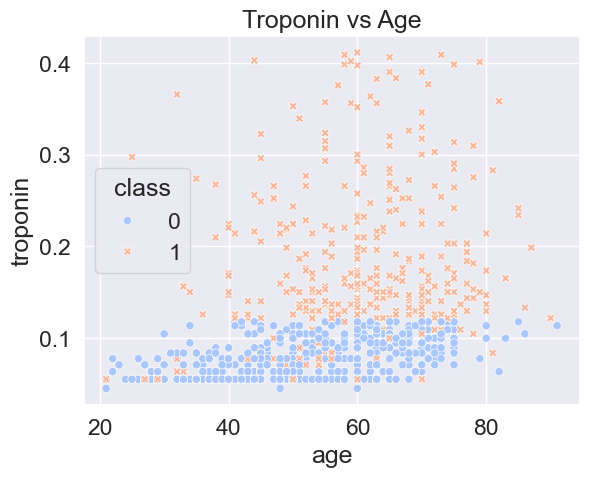

In [32]:
# Troponin vs Age
sns.scatterplot(
    x="age", 
    y="troponin", 
    data=df, 
    hue="class", 
    style="class", 
    palette="coolwarm"
).set(title="Troponin vs Age")

## Task#5
### Correlations

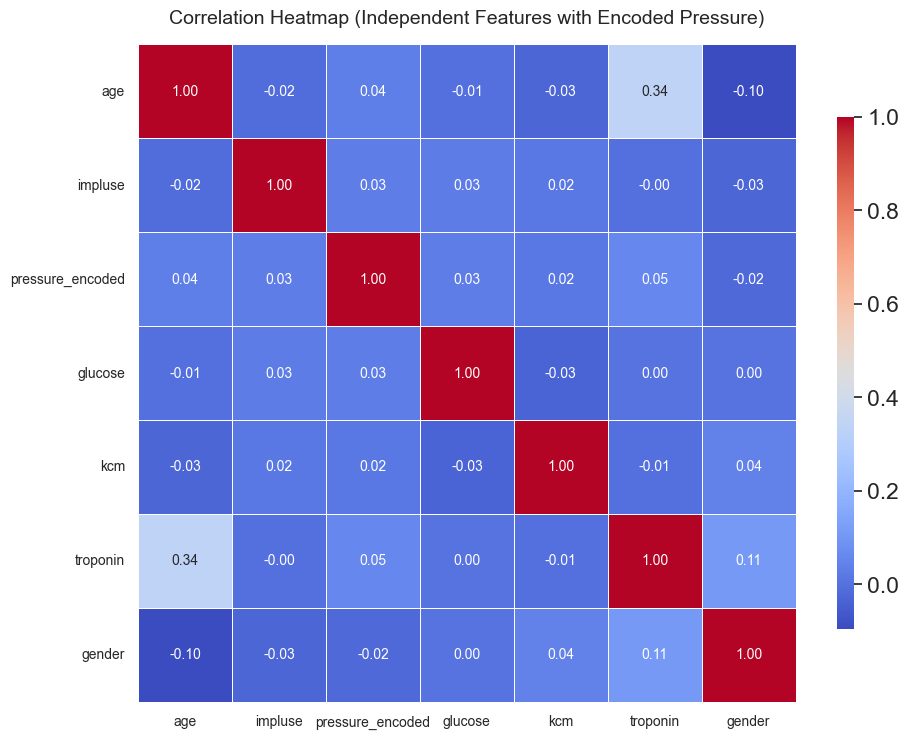

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encoding the 'pressure' column
encoder = LabelEncoder()
df['pressure_encoded'] = encoder.fit_transform(df['pressure'])

# Compute the correlation matrix for only numeric independent features (excluding 'class', as it is out target column)
df_corr = df[['age', 'impluse', 'pressure_encoded', 'glucose', 'kcm', 'troponin', 'gender']].corr()

# Set the figure size and seaborn(name of library, used to draw graphs) style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create the heatmap
ax = sns.heatmap(
    df_corr, 
    cmap="coolwarm",  # cmap is term used to set color map
    annot=True, 
    fmt=".2f", 
    cbar=True, 
    square=True,  # Ensures cells are square
    annot_kws={'size': 10},  # Text size in cells
    linewidths=0.5,  # Adds grid lines between cells
    cbar_kws={'shrink': 0.75, 'aspect': 30}  # Adjusts color bar size
)

# Adjust the axis labels and ticks
plt.xticks(rotation=0, fontsize=10)  # Horizontal x-axis ticks
plt.yticks(rotation=0, fontsize=10)  # Vertical y-axis ticks

# Title for the heatmap
plt.title("Correlation Heatmap (Independent Features with Encoded Pressure)", fontsize=14, pad=15)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()





## Task#6
### Hypothesis 


##### Older individuals tend to have higher troponin levels, which increases the risk of heart disease.
##### According to medical research, elevated troponin levels are associated with a higher risk of heart disease, especially as age increases. Troponin is a biomarker used to diagnose heart attacks and cardiovascular issues, and its levels tend to rise with age due to various age-related factors such as heart function deterioration.
##### --------------------------------------------------------------------------------------------------------------------------------

#### Null Hypothesis (H0):
#### There is no significant relationship between age and troponin levels in the population with respect to heart disease. Specifically, we assume that the correlation between age and troponin is 0.39 or lower.

##### H0: ρ (correlation between age and troponin) = 0.39

#### Alternative Hypothesis (H1):
##### There is a significant positive relationship between age and troponin levels, indicating that as age increases, troponin levels also increase, leading to a higher risk of heart disease.

##### H1: ρ (correlation between age and troponin) > 0.39
##### --------------------------------------------------------------------------------------------------------------------------------

### Why use z-test for your hypothesis?
###### Sample Size Greater than 30: Since your sample size is large (greater than 30), the z-test is appropriate. According to the Central Limit Theorem, for large sample sizes, the sampling distribution of the correlation coefficient (or other statistics) approximates a normal distribution, which justifies the use of the z-test.

######  Known Population Standard Deviation (or Approximation): Although you may not know the exact population standard deviation of the correlation, we can approximate it using the sample's standard deviation. When dealing with large sample sizes, it's reasonable to assume that the sample standard deviation can serve as a good estimate of the population's standard deviation.

###### Large Data Size for Reliable Approximation: For large datasets, the z-test tends to provide more reliable results than the t-test. The z-test assumes a normal distribution, which is approximately true for large samples (n > 30), so it avoids the complexities of the t-distribution when the sample size is large enough.

In [34]:

import scipy.stats as stats

# Sample size (n) - this should be the number of samples you have
n = len(df)

# Sample correlation (r) - this is the correlation between age and troponin
r = df['age'].corr(df['troponin'])

# Hypothesized population correlation (ρ)
rho = 0.39

# Standard error of the correlation coefficient
SE = 1 / np.sqrt(n - 3)

# Z-score for hypothesis test
z_score = (r - rho) / SE

# Calculate the p-value from the Z distribution
p_value = 1 - stats.norm.cdf(z_score)  # Since H1 is a one-tailed test

# Output the results
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")


Z-score: -1.436554857495385
P-value: 0.9245777408205758


#### Conclusion:
#### Since the p-value (0.9245) is greater than 0.05, reject the null hypothesis (H0).
##### Therefore, there is no significant positive correlation between age and troponin levels in your dataset with respect to heart disease.
###### In other words, the data does not provide strong enough evidence to support the claim that as age increases, troponin levels significantly increase, contributing to a higher risk of heart disease.

In [35]:
print(df.columns)

Index(['age', 'gender', 'impluse', 'glucose', 'kcm', 'troponin', 'class',
       'pressure', 'pressure_encoded'],
      dtype='object')


#### Chi-Square Test

In [36]:
import pandas as pd

# Compute Chi-Square Test for 'gender' and 'target'
# Replace 'gender' and 'target' with the correct column names if needed
contingency_table = pd.crosstab(df['gender'], df['class'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis (variables are associated).")
else:
    print("Conclusion: Fail to reject the null hypothesis (no association).")


Chi-Square Test Results:
Chi-Square Statistic: 6.10
Degrees of Freedom: 1
P-Value: 0.0135
Conclusion: Reject the null hypothesis (variables are associated).


#### Confidence Interval

In [37]:
import numpy as np
import pandas as pd

# Compute Confidence Interval
# Assuming normal distribution and known standard deviation for simplicity

# Define mean and standard deviation
mean_column = df['troponin'].mean()  # Replace 'troponin' if needed
std_column = df['troponin'].std()

# Set confidence level (e.g., 95%)
confidence_level = 0.95
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# Compute margin of error
margin_error = z_value * (std_column / np.sqrt(len(df)))

# Confidence interval
lower_bound = mean_column - margin_error
upper_bound = mean_column + margin_error

print(f"Confidence Interval ({confidence_level*100}%): ({lower_bound:.2f}, {upper_bound:.2f})")


Confidence Interval (95.0%): (0.12, 0.13)


Accuracy: 0.9136

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        93
           1       0.91      0.88      0.90        69

    accuracy                           0.91       162
   macro avg       0.91      0.91      0.91       162
weighted avg       0.91      0.91      0.91       162


Confusion Matrix:
[[87  6]
 [ 8 61]]

ROC-AUC Score: 0.9740


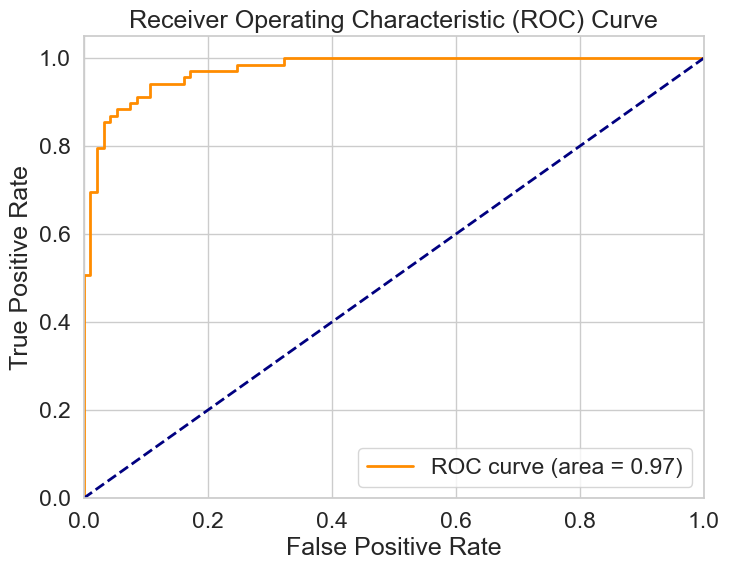

In [38]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare the data
# Select the independent variables (features) and the dependent variable (target)
X = df[['age', 'impluse', 'pressure_encoded', 'glucose', 'kcm', 'troponin', 'gender']]  # Features
y = df['class']  # Target (heart disease: 0 = negative, 1 = positive)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train data and transform
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict using the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
